This project will create a convolutional network which will be able to predict whether a plant is suffering from a disease. I use different layers and other hyperparameters for building, training and testing this classification model. I used tensorflow and keras for this project. 

In [6]:
#STEPS FOR THE PROBLEM

# 1. Visualing Images that i am working on
# 2. Finding out the mean of of the dimensions and resizing all images accordingly
# 3. converting the images into a numpy array and normalize them
# 4. checking class imbalance
# 5. splitting the data and performing one hot encoding
# 6. created model architecture , compiling the model and then fitting it
# 7. plotting accuracy and loss against each epoch
# 8. preprocessing the test data and make predictions on it
# 9. Visualizing the original and predicted labesl for the test images

Human society needs to increase food production by an estimated 70% by 2050 to feed an expected population size that is predicted to be over 9 billion people. 
Currently, infectious disease reduce the potential yield by an average of 40% with many farmers in the 
developing world experiencing yield losses as high as 100%. The widespread distribution of smartphones among crop growers
around the world with an expected 5 billion smartphones by 2020 offers the potential of turning the smartphone into a valuable
tool for diverse communities growing food. One potential application is the development of mobile disease diagnostics through machine learning and big data.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize, LabelBinarizer
from keras.preprocessing import image
from keras_preprocessing.image import img_to_array, array_to_img
# from keras.preprocessing.image import img_to_array, array_to_img
# from keras.preprocessing.image import load_img
from keras.utils.image_utils import img_to_array
from numpy import array
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical 

Data Preprocessing

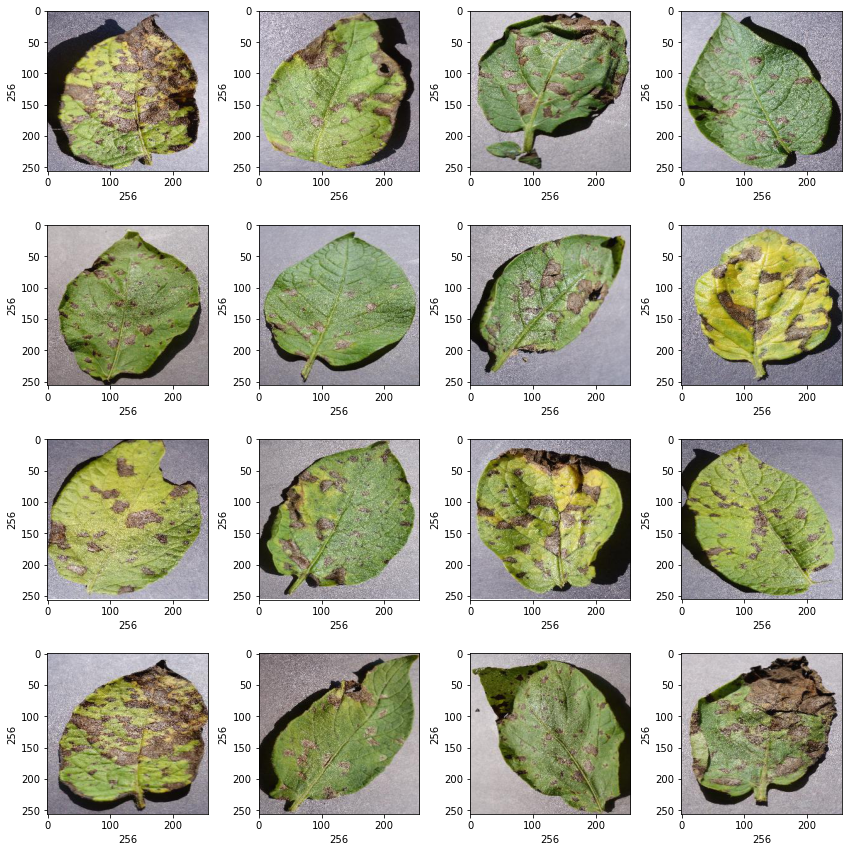

In [12]:
plt.figure(figsize = (12,12))

path = r"C:\Users\onata\Documents\Data Projects\Linkedin and github project\Plant disease Detection\PlantVillage\Potato___Early_blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path+ '/' + random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize =10) #width of image
    plt.ylabel(rand_img.shape[0], fontsize =10) #heigth of image

In [8]:
#Converting the images into array

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, (256,256))
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error: {e}")
        return None

In [9]:
dir = r"C:\Users\onata\Documents\Data Projects\Linkedin and github project\Plant disease Detection\PlantVillage"
root_dir = listdir(dir)
image_list, label_list = [],[]
all_labels = ['Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight']
binary_labels = [0,1,2]
temp = -1

#Reading and converting image to numpy array
for directory in root_dir:
    plant_image_list = listdir(f"{dir}/{directory}")
    temp += 1
    for files in plant_image_list:
        image_path = f"{dir}/{directory}/{files}"
        image_list.append(convert_image_to_array(image_path))
        label_list.append(binary_labels[temp])

In [10]:
#Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0    1000
2    1000
1     152
dtype: int64

In [11]:
#this is to check if the dataset is not balanced

In [12]:
image_list[0].shape

(256, 256, 3)

In [13]:
#checking the total number of the images which is the length of the labels list
label_list = np.array(label_list)
label_list.shape

(2152,)

In [14]:
#SPLIT AND TRAIN
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size= 0.4, random_state = 10)

In [15]:
#Normalizing the dataset of the images as the pixel values ranges from 0 to 255, by dividing each image pixels with 255 to mornalize the dataset. 

x_train = np.array(x_train, dtype=np.float16)/225.0
x_test = np.array(x_test, dtype=np.float16)/225.0
x_train = x_train.reshape(-1, 256,256,3)


In [16]:
#One hot ecoding  - this makes the machine not do priotization

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# MODEL BUILDING

In [17]:
#Creating network architecture
model = Sequential()
model.add(Conv2D(32, (3,3), padding = "same", input_shape = (256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dense(3, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 112896)            0         
                                                                 
 dense (Dense)               (None, 64)                7

In [18]:
#Compiling the model

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001), metrics = ['accuracy'])

In [19]:
#spliting to training and validation

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= 0.2)

In [20]:
#Training the model
epochs = 20
batch_size = 128
history = model.fit(x_train, y_train, batch_size= batch_size , epochs = epochs, validation_data= (x_val, y_val))

Epoch 1/20
9/9 [==============================] - 27s 2s/step - loss: 1.0036 - accuracy: 0.4031 - val_loss: 0.8311 - val_accuracy: 0.8185
Epoch 2/20
9/9 [==============================] - 16s 2s/step - loss: 0.8568 - accuracy: 0.5640 - val_loss: 0.7507 - val_accuracy: 0.6988
Epoch 3/20
9/9 [==============================] - 15s 2s/step - loss: 0.7702 - accuracy: 0.6793 - val_loss: 0.7131 - val_accuracy: 0.5598
Epoch 4/20
9/9 [==============================] - 14s 2s/step - loss: 0.6976 - accuracy: 0.7132 - val_loss: 0.5890 - val_accuracy: 0.8378
Epoch 5/20
9/9 [==============================] - 14s 2s/step - loss: 0.6057 - accuracy: 0.7878 - val_loss: 0.5717 - val_accuracy: 0.8185
Epoch 6/20
9/9 [==============================] - 14s 2s/step - loss: 0.5175 - accuracy: 0.8517 - val_loss: 0.4733 - val_accuracy: 0.8764
Epoch 7/20
9/9 [==============================] - 14s 2s/step - loss: 0.4512 - accuracy: 0.8672 - val_loss: 0.4089 - val_accuracy: 0.9073
Epoch 8/20
9/9 [==================

In [21]:
model.save(r"C:\Users\onata\Documents\Data Projects\Linkedin and github project\Plant disease Detection\PlantVillage\plant_disease.h5")
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open(r"C:\Users\onata\Documents\Data Projects\Linkedin and github project\Plant disease Detection\PlantVillage\plant_model.json",'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
model.save_weights(r"C:\Users\onata\Documents\Data Projects\Linkedin and github project\Plant disease Detection\PlantVillage\plant_model_weights.h5")

In [35]:
if x_test.shape[1] != y_test.shape[1]:
    x_test = x_test[:y_test.shape[1]]

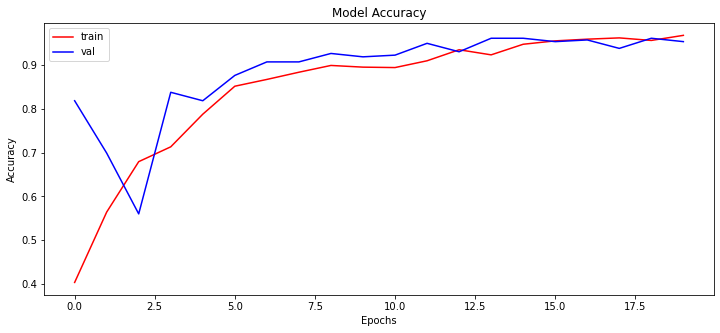

In [22]:
#Plot the training history
#plot the accuracy of the model for the training history
plt.figure(figsize = (12,5))
plt.plot(history.history['accuracy'], color = 'r')
plt.plot(history.history['val_accuracy'], color = 'b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [44]:
if x_test.shape[0] != y_test.shape[0]:
    x_test = x_test[:y_test.shape[0]]

In [ ]:
#to evaluate the model to know the accuracy of the model

print("[INFO] Calculating model accuraccy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[0]*100}")

In [23]:
#to evaluate the model to know the accuracy of the model

print("[INFO] Calculating model accuraccy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[0]*100}")

[INFO] Calculating model accuraccy
27/27 [==============================] - 3s 101ms/step - loss: 0.1645 - accuracy: 0.9466
Test Accuracy: 16.452163457870483


In [24]:
#Prediction using the model
y_pred = model.predict(x_test)

27/27 [==============================] - 3s 98ms/step


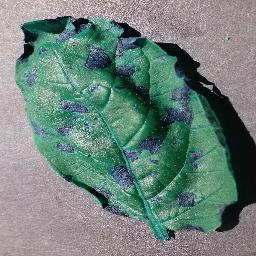

In [25]:
#plotting image to compare

img = array_to_img(x_test[10])
img

In [28]:
#Finding max value from prediction list and comparing original value vs predicted 

print("Originally: ", all_labels[np.argmax(y_test[12])])
print("Predicted: ", all_labels[np.argmax(y_pred[12])])

Originally:  Potato___Late_blight
Predicted:  Potato___Late_blight
